In [1]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [13]:
data = asarray([["red"], ["green"], ["blue"]])

In [14]:
data

array([['red'],
       ['green'],
       ['blue']], dtype='<U5')

In [15]:
encoder = OrdinalEncoder()

In [16]:
result = encoder.fit_transform(data)

In [17]:
result

array([[2.],
       [1.],
       [0.]])

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
encoder = OneHotEncoder(sparse=False)

In [20]:
result = encoder.fit_transform(data)

In [21]:
result

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [22]:
import pandas as pd
import sklearn.preprocessing as preproc

In [23]:
df = pd.read_csv("OnlineNewsPopularity.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

* note the leadin whitespaces in column 1

In [25]:
df = pd.read_csv("OnlineNewsPopularity.csv", delimiter=', ')

/home/damien/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [26]:
df.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1                  0.791946        3.0             1.0       1.0  ...   
2                  0.663866        3.0             1.0       1.0  ...   
3                  0.665635        9.0             0.0       1.0  ...   
4                  0.540890       19.0            19.0      20.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 61 columns]

In [27]:
df["n_tokens_content"]

0         219.0
1         255.0
2         211.0
3         531.0
4        1072.0
          ...  
39639     346.0
39640     328.0
39641     442.0
39642     682.0
39643     157.0
Name: n_tokens_content, Length: 39644, dtype: float64

In [29]:
df["minmax"] = preproc.minmax_scale(df[["n_tokens_content"]])

*note the double [[ above to make an array

In [31]:
df["minmax"]

0        0.025844
1        0.030092
2        0.024900
3        0.062662
4        0.126505
           ...   
39639    0.040831
39640    0.038707
39641    0.052160
39642    0.080481
39643    0.018527
Name: minmax, Length: 39644, dtype: float64

In [32]:
df["standardised"] = preproc.StandardScaler().fit_transform(df[["n_tokens_content"]])

In [33]:
df["standardised"]

0       -0.695210
1       -0.618794
2       -0.712192
3       -0.032933
4        1.115439
           ...   
39639   -0.425630
39640   -0.463838
39641   -0.221852
39642    0.287592
39643   -0.826817
Name: standardised, Length: 39644, dtype: float64

In [40]:
df["L2_normalised"] = preproc.normalize(df[["n_tokens_content"]], axis=0)

In [41]:
df["L2_normalised"]

0        0.001524
1        0.001775
2        0.001469
3        0.003696
4        0.007462
           ...   
39639    0.002408
39640    0.002283
39641    0.003077
39642    0.004747
39643    0.001093
Name: L2_normalised, Length: 39644, dtype: float64

Text(27.125, 0.5, 'No. of Articles')

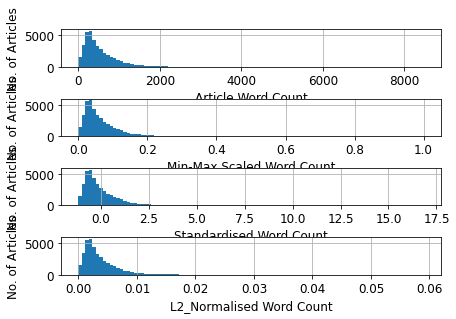

In [42]:
import matplotlib.pyplot as plt
fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()

df["n_tokens_content"].hist(ax=ax1,bins=100)
ax1.tick_params(labelsize=12)
ax1.set_xlabel("Article Word Count", fontsize=12)
ax1.set_ylabel("No. of Articles", fontsize=12)

df["minmax"].hist(ax=ax2,bins=100)
ax2.tick_params(labelsize=12)
ax2.set_xlabel("Min-Max Scaled Word Count", fontsize=12)
ax2.set_ylabel("No. of Articles", fontsize=12)

df["standardised"].hist(ax=ax3,bins=100)
ax3.tick_params(labelsize=12)
ax3.set_xlabel("Standardised Word Count", fontsize=12)
ax3.set_ylabel("No. of Articles", fontsize=12)

df["L2_normalised"].hist(ax=ax4,bins=100)
ax4.tick_params(labelsize=12)
ax4.set_xlabel("L2_Normalised Word Count", fontsize=12)
ax4.set_ylabel("No. of Articles", fontsize=12) 